In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
properties = pd.read_csv('cleaned_output_x.csv')
properties.head()

,id,type of property,subtype of property,province,locality,postalCode,price,number of bedrooms,living area,fully equipped kitchen,...,open fire,terrace,terrace area,garden,garden area,total property area,total land area,number of facades,swimming pool,state of the building
0,10492614,HOUSE,HOUSE,Liège,Saint-Nicolas,4420.0,20000.0,3.0,38.0,1.0,...,0.0,1.0,NaN,NaN,NaN,206.0,194.0,NaN,0.0,good
1,10664145,HOUSE,CHALET,Luxembourg,DURBUY,6940.0,22000.0,2.0,0.0,NaN,...,0.0,1.0,15.0,NaN,NaN,40.0,200.0,4.0,0.0,0
2,10578200,APARTMENT,APARTMENT,Hainaut,La Louviere,7110.0,39000.0,1.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,44.0,0.0,2.0,0.0,needs renovating
3,10248737,HOUSE,HOUSE,Liège,Flémalle,4400.0,40000.0,2.0,21.0,0.0,...,0.0,NaN,NaN,NaN,NaN,106.0,110.0,3.0,0.0,needs renovating
4,10576318,HOUSE,HOUSE,Liège,Liège Wandre,4020.0,59000.0,4.0,29.0,0.0,...,0.0,NaN,NaN,NaN,NaN,144.0,80.0,2.0,0.0,needs renovating


In [3]:
# What are the dimensions of my data set?
shape = properties.shape
print("The data set consists of " + str(shape[0]) + " rows and " + str(shape[1]) + " columns.")

The data set consists of 11992 rows and 21 columns.


In [4]:
# What is the quantity of 'x' per column?
missing_value_quantities = {}
print('Total quantity of missing data per column \n')
for column in properties.columns:
    count = (properties[column] == 'x').sum()
    missing_value_quantities[column] = count
    print(str(column) +': ' + str(missing_value_quantities[column]))

Total quantity of missing data per column 

id: 0
type of property: 0
subtype of property: 0
province: 0
locality: 0
postalCode: 0
price: 0
number of bedrooms: 0
living area: 0
fully equipped kitchen: 0
furnished: 0
open fire: 0
terrace: 0
terrace area: 0
garden: 0
garden area: 0
total property area: 0
total land area: 0
number of facades: 0
swimming pool: 0
state of the building: 0


From this output I can deduce that it would not be feasible to use the *entire* Dataset to analyse the following attritutes:
* furnished
* terrace
* terrace area
* garden
* garden area
* total land area
* number of facades
* swimming pool

Since at least 20% of the properties are missing data for these.

And, I can deduce that using:
* total property area

Will also carry risk since over 2% of the data is missing this information.

Therefore, when analysing an attritube, I will discard the rows with that do not contain data for that attritube.
* e.g. if I want to see the average price per property square meter, I will discard the 297 rows that are missing total property area data and use the remaining 11,695
***


First of all I'd like to see if there is any correlation between the price of a proeprty, and the variables. For each column I will calculate the price with an attribute, or without an attribute, and see the difference. 

Below is a barchart comparing the mean average price of houses in belgium to the mean average price of apartments:

{'Apartment': 455609, 'House': 594283}
[456000, 594000]


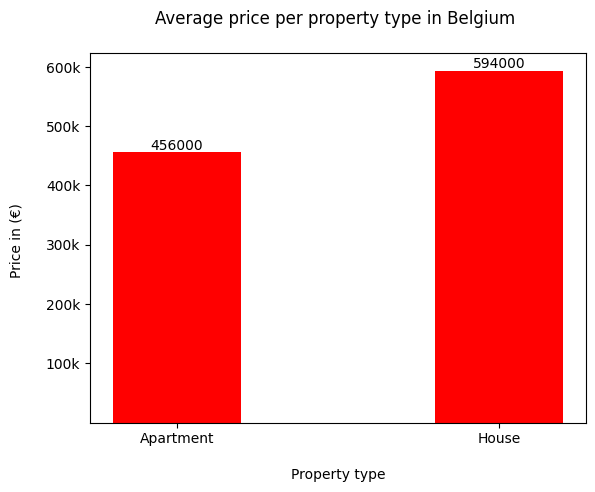

In [130]:
# Type of property House vs. appartment

apartment_average = properties[properties['type of property'] == 'APARTMENT']['price'].mean()
apartment_average = int(apartment_average)

house_average = properties[properties['type of property'] == 'HOUSE']['price'].mean()
house_average = int(house_average)

average_price = {}
average_price['Apartment'] = apartment_average
average_price['House'] = house_average
print(average_price)

price_keys = list(average_price.keys())
price_values = list(average_price.values())



for price in range(len(price_values)):
    rounded = round(price_values[price], -3)
    price_values[price] = rounded
print(price_values)

plt.bar(price_keys, price_values, width = 0.4, color = 'red')
plt.title('Average price per property type in Belgium \n')
plt.xlabel('\nProperty type')
plt.ylabel('Price in (€) \n')
plt.bar_label(plt.bar(price_keys, price_values, width = 0.4, color = 'red'))
plt.yticks([100000, 200000 , 300000 , 400000 , 500000 , 600000] , ['100k' , '200k' , '300k' , '400k' , '500k' , '600k'])
plt.show()



Clearly an average house is more expensive than an apartment, by almost 140,000€.

Below I begin to build new dataframes that exclude non-existant data for each variable.

In [6]:
# Write new dataframes containing the numerical data and excluding empty data
# Continuous data is written between 1 and infinity, discrete data is written between 0 (no) and 1 (yes)
open_fire = properties.loc[properties['open fire'].between(0,1, inclusive='both')]
bedrooms = properties.loc[properties['number of bedrooms'].between(1,np.inf, inclusive='both')]
living_area = properties.loc[properties['living area'].between(1,np.inf, inclusive='both')]
kitchen = properties.loc[properties['fully equipped kitchen'].between(0,1, inclusive='both')]
terrace = properties.loc[properties['terrace'].between(0,1, inclusive='both')]
terrace_area = properties.loc[properties['terrace area'].between(1,np.inf, inclusive='both')]
garden = properties.loc[properties['garden'].between(0, np.inf, inclusive='both')]
garden_area = properties.loc[properties['garden area'].between(1,np.inf, inclusive='both')]
property_area =  properties.loc[properties['total property area'].between(1,np.inf, inclusive='both')]
land_area =  properties.loc[properties['total land area'].between(1,np.inf, inclusive='both')]
facades =  properties.loc[properties['number of facades'].between(1,np.inf, inclusive='both')]
swimming =  properties.loc[properties['swimming pool'].isin([1])]
state =  properties.loc[properties['state of the building'].isin(['good', 'as_new', 'needs renovating' , 'just renovated'])]
living_area.shape


"\nopen_fire = properties.loc[properties['open fire'].between(0,1, inclusive='both')]\nbedrooms = properties.loc[properties['number of bedrooms'].between(1,np.inf, inclusive='both')]\nliving_area = properties.loc[properties['living area'].between(1,np.inf, inclusive='both')]\nkitchen = properties.loc[properties['fully equipped kitchen'].between(0,1, inclusive='both')]\nterrace = properties.loc[properties['terrace'].between(0,1, inclusive='both')]\nterrace_area = properties.loc[properties['terrace area'].between(1,np.inf, inclusive='both')]\ngarden = properties.loc[properties['garden'].between(0, np.inf, inclusive='both')]\ngarden_area = properties.loc[properties['garden area'].between(1,np.inf, inclusive='both')]\nproperty_area =  properties.loc[properties['total property area'].between(1,np.inf, inclusive='both')]\nland_area =  properties.loc[properties['total land area'].between(1,np.inf, inclusive='both')]\nfacades =  properties.loc[properties['number of facades'].between(1,np.inf, 

Using my newly constructred dataframes, I can start to analyse price vs. variables

First I begin with total property area, for properties valued between 0€ and 2m€, and with a maximum property space of 1000m²

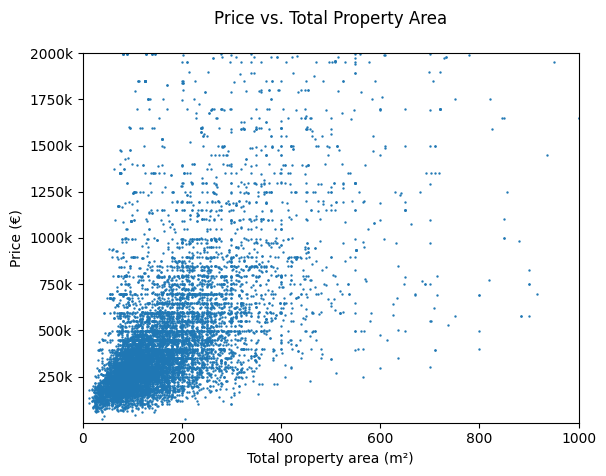

In [7]:
# Scatter for price vs. property_area

total_area_data = properties['total property area']
price_total_area_data = properties['price']


plt.scatter(total_area_data, price_total_area_data, s=0.5)
plt.xlim(0, 1000)
plt.ylim(0,2000000)
plt.yscale('linear') 
plt.yticks([250000, 500000 , 750000 , 1000000 , 1250000 , 1500000, 1750000 , 2000000] , ['250k' , '500k' , '750k' , '1000k' , '1250k' , '1500k', '1750k', '2000k'])
plt.xlabel('Total property area (m²)')
plt.ylabel('Price (€)')
plt.title('Price vs. Total Property Area\n')
plt.show()

Clearly there is a positive correlation here, though it is difficult to visualise the density in the sub 0-1m€ and sub 0-400m² ranges.

The chart below zeroes-in on the dense section to visualise where the data lies.

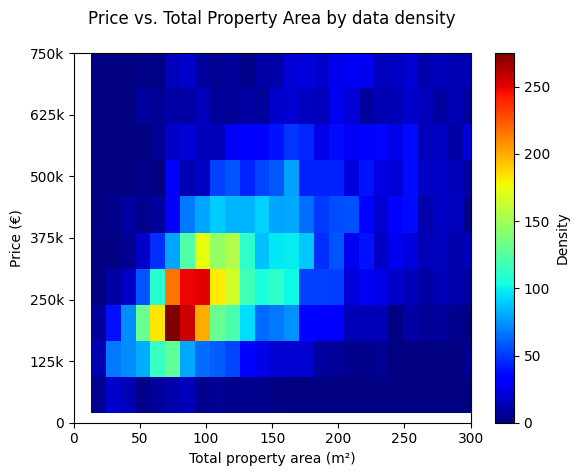

In [118]:
nanless_prop_area = properties.loc[properties['total property area'].between(1,np.inf, inclusive='both')]


heatmap, xedges, yedges, _ = plt.hist2d(nanless_prop_area['total property area'], nanless_prop_area['price'], bins=150, cmap='jet')

plt.colorbar(label='Density')
plt.xlim(0, 300)
plt.ylim(0,100000)
plt.yscale('linear') 
plt.yticks([0, 125000, 250000, 375000, 500000, 625000, 750000] , ['0' , '125k', '250k' , '375k', '500k' , '625k', '750k'])
plt.xlabel('Total property area (m²)')
plt.ylabel('Price (€)')
plt.title('Price vs. Total Property Area by data density\n')

plt.show()

But neither of these massively help me visualise the actual relationship between price and area. To do this, I will want to calulcate the average price per square meter of a house.

In [31]:
# Add price per sq m to the dataframe
price_per_sqm = nanless_prop_area['price'] / nanless_prop_area['total property area']
print("The average price of land across all of Belgium is "+ str(round(price_per_sqm.mean(), 2)) +" €/m².")

The average price of land across all of Belgium is 3267.33 €/m².


I can try and break this down by province, too.

In [97]:
brussels = properties[properties['province'] == 'Brussels']
west_flanders = properties[properties['province'] == 'West Flanders']
east_flanders = properties[properties['province'] == 'East Flanders']
antwerp = properties[properties['province'] == 'Antwerp']
liege = properties[properties['province'] == 'Liège']
flemish_brabant = properties[properties['province'] == 'Flemish Brabant']
hainaut = properties[properties['province'] == 'Hainaut']
walloon_brabant = properties[properties['province'] == 'Walloon Brabant']
luxembourg = properties[properties['province'] == 'Luxembourg']
namur = properties[properties['province'] == 'Namur']
limburg = properties[properties['province'] == 'Limburg']

province_list = [brussels, west_flanders, east_flanders, antwerp, liege, flemish_brabant, hainaut, walloon_brabant, luxembourg, namur, limburg]
province_names = ['Belgium' , 'Brussels', 'West Flanders', 'East Flanders', 'Antwerp', 'Liège', 'Flemish Brabant', 'Hainaut', 'Walloon Brabant', 'Luxembourg', 'Namur', 'Limburg']


province_land = {}
province_land['Belgium'] = round(price_per_sqm.mean(), 2)
for i in range(len(province_list)):
    prov_avg = province_list[i]['price per sqm'].mean()
    province_land[province_names[i+1]] = round(prov_avg, 2)
    print("The average price of land in " + province_names[i+1] + " is " + str(round(prov_avg, 2)) +" €/m².")

print(province_land)

The average price of land in Brussels is 3819.13 €/m².
The average price of land in West Flanders is 5203.27 €/m².
The average price of land in East Flanders is 2564.81 €/m².
The average price of land in Antwerp is 3067.77 €/m².
The average price of land in Liège is 1872.08 €/m².
The average price of land in Flemish Brabant is 2973.16 €/m².
The average price of land in Hainaut is 1705.16 €/m².
The average price of land in Walloon Brabant is 2914.33 €/m².
The average price of land in Luxembourg is 1870.88 €/m².
The average price of land in Namur is 2068.91 €/m².
The average price of land in Limburg is 2510.84 €/m².
{'Belgium': 3267.33, 'Brussels': 3819.13, 'West Flanders': 5203.27, 'East Flanders': 2564.81, 'Antwerp': 3067.77, 'Liège': 1872.08, 'Flemish Brabant': 2973.16, 'Hainaut': 1705.16, 'Walloon Brabant': 2914.33, 'Luxembourg': 1870.88, 'Namur': 2068.91, 'Limburg': 2510.84}


[3267.33, 3819.13, 5203.27, 2564.81, 3067.77, 1872.08, 2973.16, 1705.16, 2914.33, 1870.88, 2068.91, 2510.84]


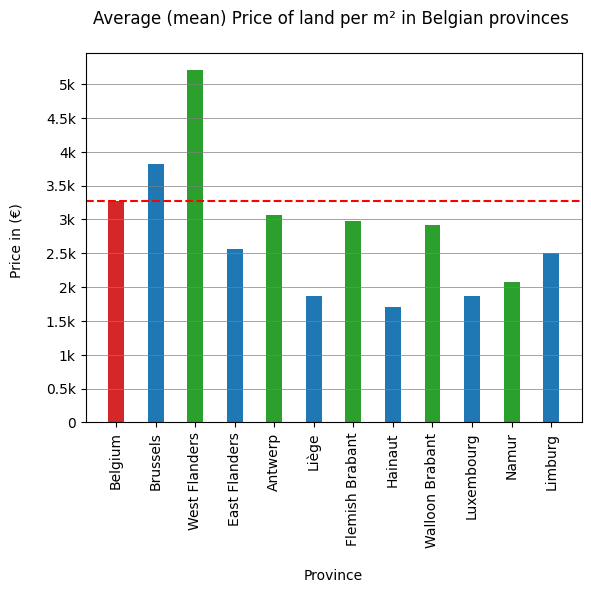

In [121]:
province_land_avgs = []
for key, value in province_land.items():
    try:
        province_land_avgs.append(value)
    except:
        pass
print(province_land_avgs)

bar_colours2 = ['tab:blue', 'tab:green']
bar_colours = ['tab:red', *bar_colours2, *bar_colours2, *bar_colours2, *bar_colours2, *bar_colours2, *bar_colours2, ]
plt.bar(province_names, province_land_avgs, width = 0.4, color = bar_colours)
plt.title('Average (mean) Price of land per m² in Belgian provinces \n')
plt.xlabel('\nProvince')
plt.ylabel('Price in (€) \n')
plt.xticks(rotation='vertical')
first_bar_height = province_land_avgs[0]
plt.axhline(first_bar_height, color='red', linestyle='--')
plt.grid(axis='y', linewidth=0.5, linestyle='-', color='gray')
plt.yticks([0, 500, 1000 , 1500 , 2000 , 2500 , 3000, 3500, 4000, 4500, 5000],['0', '0.5k' , '1k', '1.5k', '2k', '2.5k', '3k', '3.5k', '4k', '4.5k', '5k'])
plt.show()

From the above graph we can see that West Flanders contains by far the most expensive properties by €/m² in Belgium. Other than Brussels, every other province is cheaper than the national average. But maybe we can break this down by property type?